<a href="https://colab.research.google.com/github/GJ0rdan/Speed-Dating/blob/main/speeddatingeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports and upload data
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/Speed Dating Data.csv', encoding='ISO-8859-1')



In [ ]:
print(f"** df has {df.shape[0]} rows and {df.shape[1]} columns **")
df.describe()

** df has 8378 rows and 195 columns **


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


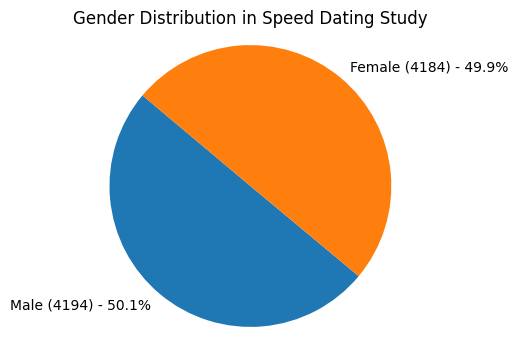

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and map gender
df['gender_label'] = df['gender'].map({0: 'Female', 1: 'Male'})
gender_counts = df['gender_label'].value_counts()

# Create labels with counts and percentages
labels = [f"{gender} ({count}) - {count / gender_counts.sum():.1%}"
          for gender, count in zip(gender_counts.index, gender_counts.values)]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=labels, autopct='', startangle=140)
plt.title("Gender Distribution in Speed Dating Study")
plt.axis('equal')  # keeps the pie chart round
plt.show()

In [ ]:
df.groupby('satis_2').size()

,0
satis_2,
1.0,73
2.0,412
3.0,520
4.0,722
5.0,1272
6.0,1886
7.0,1383
8.0,894
9.0,239


In [ ]:
df.groupby('attr7_2').size()

,0
attr7_2,
10.0,208
15.0,103
16.0,14
18.0,37
20.0,330
22.0,18
24.0,7
25.0,137
30.0,376


# Missing Data
A heatmap of the missing data to demonstrate how extensive the missing data is

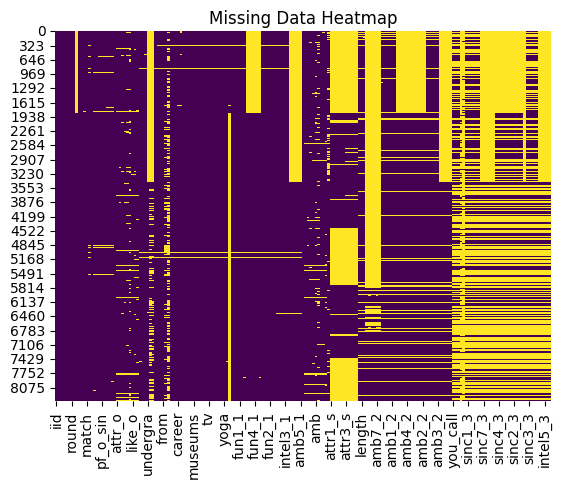

In [ ]:

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
print(df['satis_2'].describe())

count    7463.000000
mean        5.711510
std         1.820764
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: satis_2, dtype: float64


# Comparing Fun and Attraction
A regression plot to display the comparison between the two. Its very hard to tell but attraction preforms slightly better.

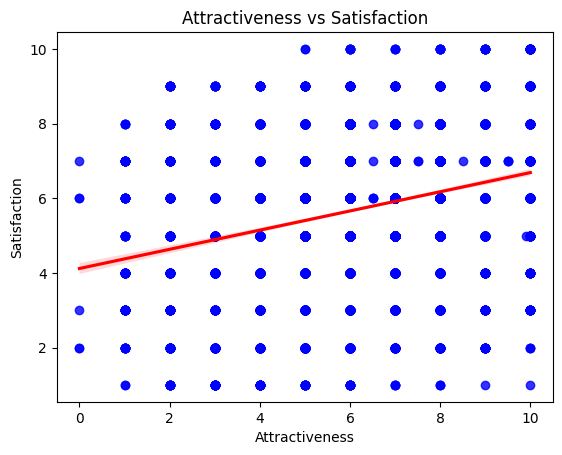

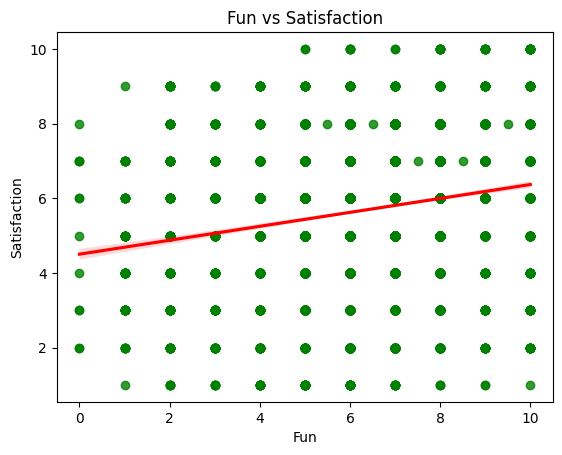

In [ ]:
# Regression plot for 'attractiveness' vs 'satisfaction'
sns.regplot(x='attr', y='satis_2', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Attractiveness vs Satisfaction')
plt.xlabel('Attractiveness')
plt.ylabel('Satisfaction')
plt.show()

# Regression plot for 'fun' vs 'satisfaction'
sns.regplot(x='fun', y='satis_2', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Fun vs Satisfaction')
plt.xlabel('Fun')
plt.ylabel('Satisfaction')
plt.show()




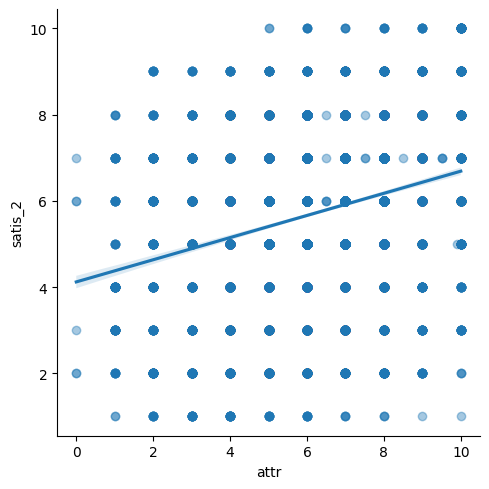

In [ ]:
import seaborn as sns
sns.lmplot(data=df, x='attr', y='satis_2', scatter_kws={'alpha':0.4})

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data.head(15))  # Top 15 columns with the most missing values

num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
shar7_2     6404
attr7_2     6394
intel7_2    6394
fun7_2      6394
amb5_3      6362
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
dtype: int64


# **Preprocessing**

This data is essentially swiss cheese so I tried my best to drop the least amount of columns and impute the rest just try to maintain a semblance of structure to the data.

For the imputation I used KNN because I felt that if I just imputed the values with the mean I would get too much noise in the data. Also I dropped all the catagorical information to simplify my model approach.

In [ ]:

#Drop columns with more than 55% missing values to retain a semblance of data
df = df.dropna(axis=1, thresh=int(0.45 * len(df)))

#dropping columns that contain catagroical data
df = df.drop(columns=['field', 'from','career'])

print(f"** df now has {df.shape[0]} rows and {df.shape[1]} columns **")

** df now has 8378 rows and 158 columns **


In [ ]:

for col in df.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert to numeric, handling commas and errors
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
    except AttributeError:
        # Skip columns without .str accessor (already numeric or other types)
        pass


#using Kmeans as a way of imputing data in a more technical way.
imputer = KNNImputer(n_neighbors=5, weights='distance')
# Get the imputed data
imputed_data = imputer.fit_transform(df)

# Get the columns that were kept by the imputer
# This assumes that the imputer removes columns by dropping them
# and maintains the order of the remaining columns.
kept_columns = df.columns[~df.isnull().all()] # Only get columns that did not get removed

# Create the DataFrame with the imputed data and correct columns
df = pd.DataFrame(imputed_data, columns=kept_columns)


# **Feature engineering**

I took the average of every attribute column that prompts the individual to
rate themselves trying to improve the accuracy of my models. Was concerned at first that this would potentially lead to overfitting in my model, but this worked well because there were multiple rounds of dates. Meaning the average across all the dates helped make solidified columns.

In [ ]:


df['fun_avg'] = df[['fun', 'fun_o', 'fun1_1','fun2_1','fun1_2']].mean(axis=1)

df['attr_avg'] = df[['attr', 'attr_o', 'attr1_1','attr2_1','attr1_2']].mean(axis=1)

df['intel_avg'] = df[['intel', 'intel_o', 'intel1_1','intel2_1','intel1_2']].mean(axis=1)

df['amb_avg'] = df[['amb', 'amb_o', 'amb1_1','amb2_1','amb1_2']].mean(axis=1)

df['sinc_avg'] = df[['sinc', 'sinc_o', 'sinc1_1','sinc2_1','sinc1_2']].mean(axis=1)

df['shar_avg'] = df[['shar', 'shar_o', 'shar1_1','shar2_1','shar1_2']].mean(axis=1)


## Linear Regression
For my first model I used a linear regression just to get things going. It had very poor outcomes so I did not rely on this model very much.

In [ ]:
# Model 1: Using Partner-Specific Features
# Prepare the data
X1 = df[['attr_o', 'fun']]
y1 = df['satis_2']

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create and fit the model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Print model coefficients
print("Model 1: Using Partner-Specific Features")
print(f"Intercept: {model1.intercept_}")
print(f"Attractiveness coefficient: {model1.coef_[0]}")
print(f"Fun coefficient: {model1.coef_[1]}")

# Predictions and metrics
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print("-------------------------")
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r2_1}")

Model 1: Using Partner-Specific Features
Intercept: 5.022583628106361
Attractiveness coefficient: -0.08639523769389947
Fun coefficient: 0.18884174422470099
-------------------------
Mean Squared Error: 3.007223996339418
R^2 Score: 0.036720989989803665


In [61]:
# Model 2: Using Participant-Average Features
# Prepare the data
X2 = df[['attr_avg', 'fun_avg']]
y2 = df['satis_2']

# Create and fit the model
model2 = LinearRegression()
model2.fit(X2, y2)

# Print model coefficients
print("\nModel 2: Using Participant-Average Features")
print(f"Intercept: {model2.intercept_}")
print(f"Attractiveness coefficient: {model2.coef_[0]}")
print(f"Fun coefficient: {model2.coef_[1]}")

# Predictions and metrics
y2_pred = model2.predict(X2)
mse2 = mean_squared_error(y2, y2_pred)
r2_2 = r2_score(y2, y2_pred)
print("-------------------------")
print(f"Mean Squared Error: {mse2}")
print(f"R^2 Score: {r2_2}")


Model 2: Using Participant-Average Features
Intercept: 5.590653199458639
Attractiveness coefficient: -0.004012910799687747
Fun coefficient: 0.014393956337934565
-------------------------
Mean Squared Error: 3.2068968112215854
R^2 Score: 0.0009327544840872504


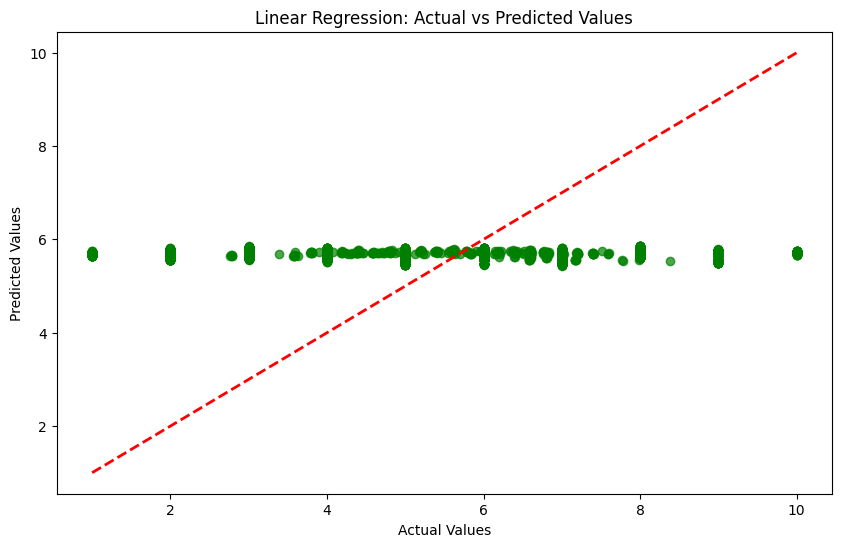

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y2, y2_pred, alpha=0.7, color='green')
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

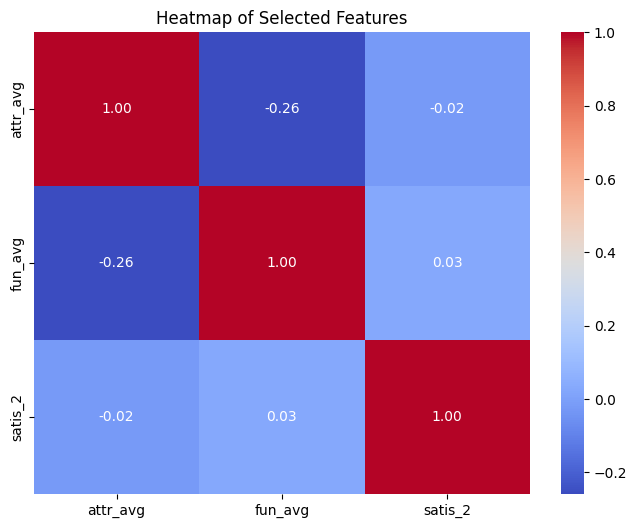

In [ ]:
# Creating a heatmap to visualize the correlation matrix of the data.

# Compute the correlation matrix of the selected features
correlation_matrix = df[['attr_avg', 'fun_avg', 'satis_2']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Selected Features")
plt.show()


In [ ]:
data = df[['attr_avg','fun_avg','intel_avg','amb_avg','sinc_avg','shar_avg','satis_2']]

X = data[['attr_avg','fun_avg','intel_avg','amb_avg','sinc_avg',"shar_avg",]] #Dpndt Variables  # Feature (attractiveness rating)
y = data['satis_2']     # Indpt Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}


# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_rf_best)
r2_best = r2_score(y_test, y_pred_rf_best)

print(f"Mean Squared Error: {mse_best}")
print(f"R^2 Score: {r2_best}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 0.8121204736219553
R^2 Score: 0.7398602143399255


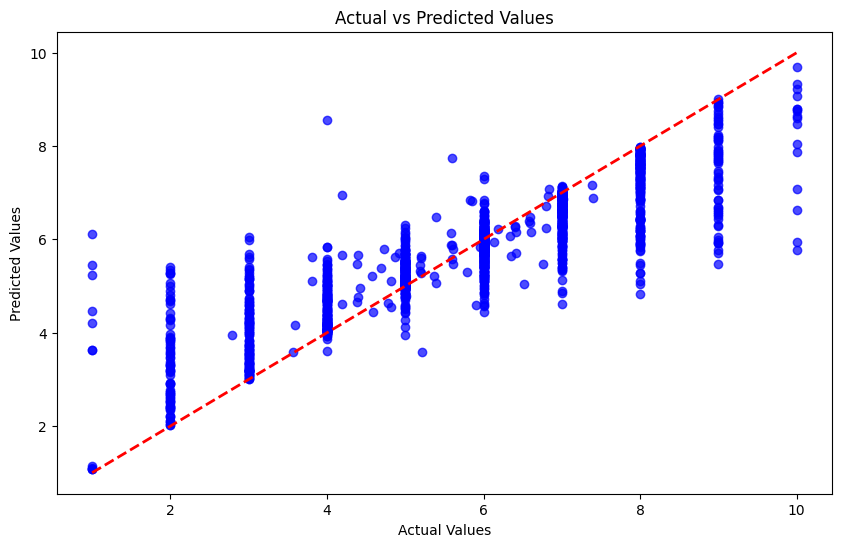

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_best, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Best Attributes

Found that the best variable by far for predicting satisfaction was physical attractiveness. Fun, unfortunately for our funny folk, performed the worst out of all the attributes. Interestingly enough sincerity and shared interests were the second most in the running.


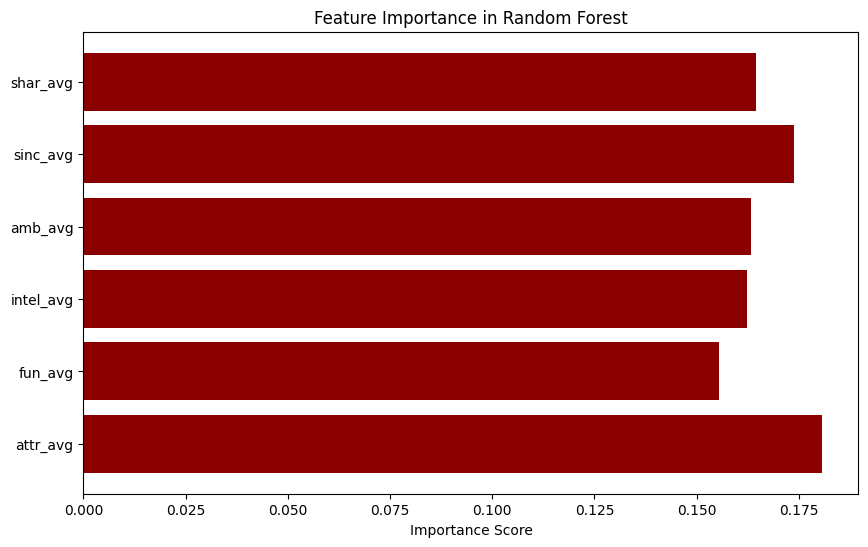

In [ ]:

# Feature importance
importances = best_rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='darkred')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest')
plt.show()


# Neural Network

This model did fairly well but did not perform as well as RF. Stil provided a nice comparison to my RF. The model shows that the predicitions are holding up.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model

# Train the model
model = build_model(X_train_scaled.shape[1])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)


# Check shapes before evaluating
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

y_pred = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, y_pred)

# Evaluate
loss, mae, mse = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.4f} | Test MSE: {mse:.4f} | R² Score (NN): {r2:.4f} ")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10.7963 - mae: 2.6329 - mse: 10.7963 - val_loss: 3.4973 - val_mae: 1.4934 - val_mse: 3.4973
Epoch 2/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2496 - mae: 1.4453 - mse: 3.2496 - val_loss: 2.9648 - val_mae: 1.3485 - val_mse: 2.9648
Epoch 3/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.9651 - mae: 1.3625 - mse: 2.9651 - val_loss: 2.8776 - val_mae: 1.3371 - val_mse: 2.8776
Epoch 4/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8921 - mae: 1.3368 - mse: 2.8921 - val_loss: 2.8688 - val_mae: 1.3031 - val_mse: 2.8688
Epoch 5/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7555 - mae: 1.3099 - mse: 2.7555 - val_loss: 2.9332 - val_mae: 1.3196 - val_mse: 2.9332
Epoch 6/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6903 - mae: 1.2842 - mse: 2.6903 - val_loss: 2.7422 - val_mae: 1.3193 - val_mse: 2.7422
Epoch 7/100
537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5890 - mae: 1.2620 - mse: 2.5890 - val_lo

## Neural Network Performance
I wanted to see whether my model was holding up to the actual data. This graph displays that it did fairly well.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


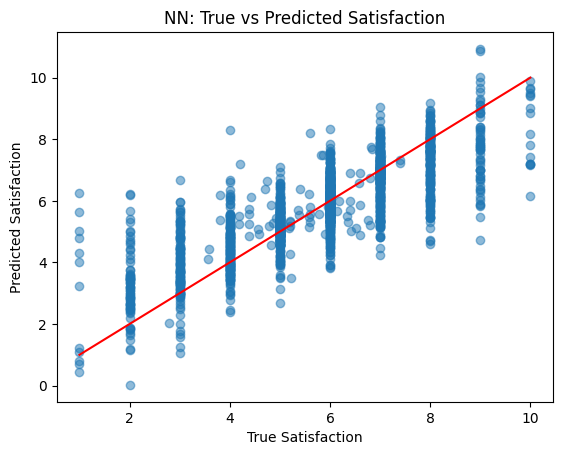

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled).flatten()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("NN: True vs Predicted Satisfaction")
plt.plot([1, 10], [1, 10], color='red')  # line of perfect prediction
plt.show()

